In [94]:
import numpy as np
import sklearn
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [16]:
sklearn.__version__

'1.2.0'

# Data
Let's initialize the dummy dataset

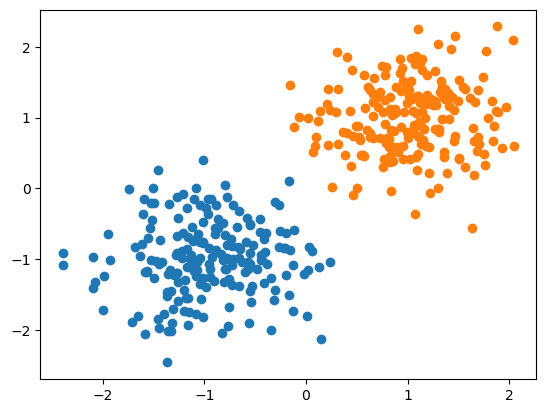

In [28]:
data1 = np.random.normal(loc=-1, scale=.5, size=(2, 200))
data2 = np.random.normal(loc=1, scale=.5, size=(2, 200))
#data1 = np.concatenate((data1, np.ones((1, 200))), axis=0)
#data2 = np.concatenate((data2, np.zeros((1, 200))), axis=0)

plt.scatter(data1[0], data1[1])
plt.scatter(data2[0], data2[1])

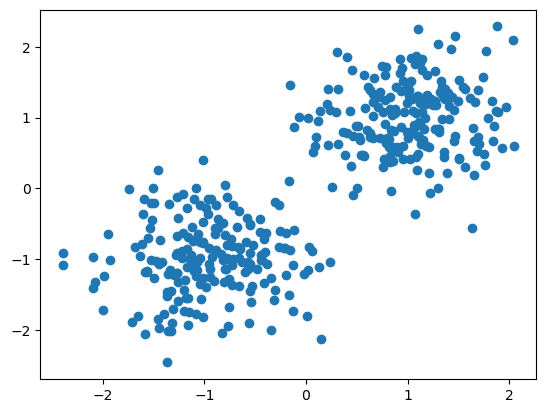

In [29]:
data = np.concatenate((data1, data2), axis=-1)
plt.scatter(data[0], data[1])

In [30]:
data.shape

(2, 400)

# Clustering algorithms
We will now implement various types of clustering algorithms and keep in mind the advantages and weaknesses of various algorithms.

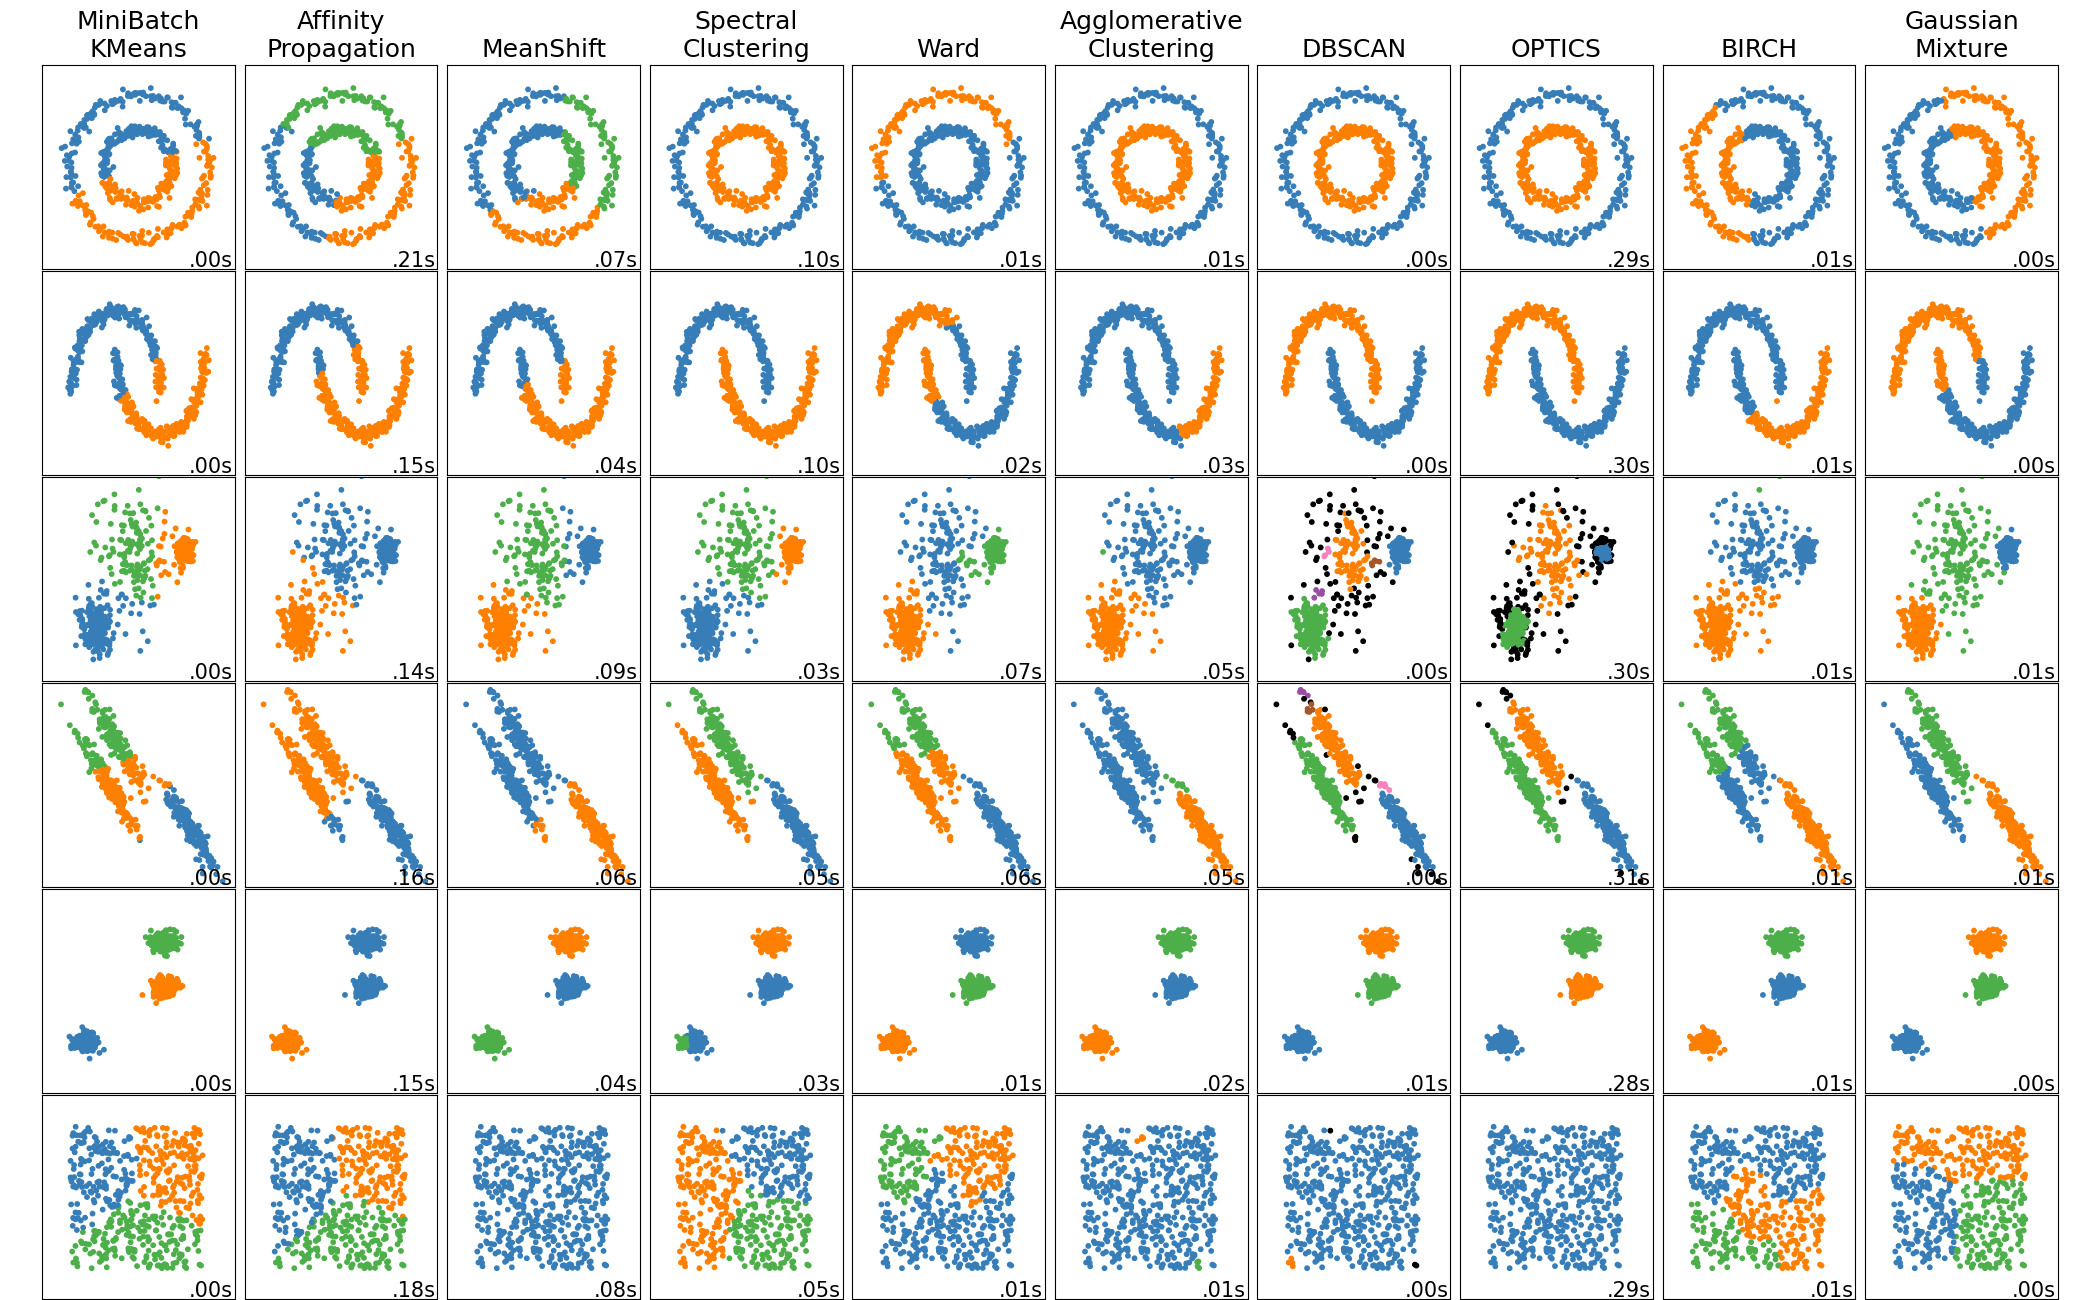

In [61]:
# Requires the shape tp be (number of elements, dimensions...)

def try_method(model, X):
    pred = model.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=pred)
    return pred

## Affinity Propagation

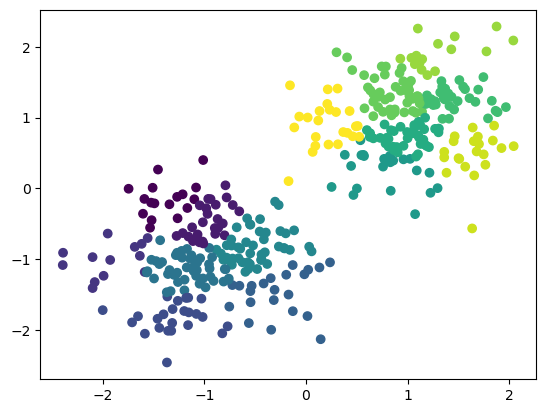

In [98]:
pred_ap = try_method(sklearn.cluster.AffinityPropagation(damping=0.7), data.T)

## DBSCAN

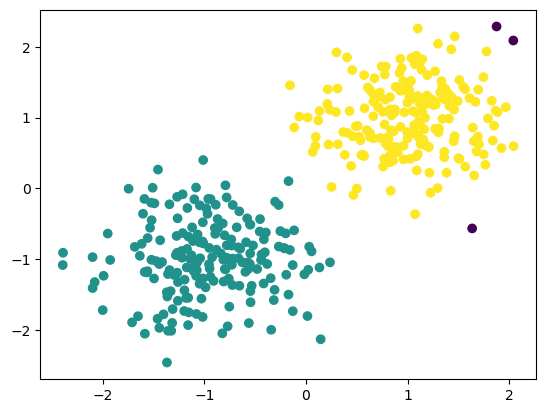

In [75]:
pred_dbscan = try_method(sklearn.cluster.DBSCAN(eps=0.50, min_samples=9), data.T)

## K-Means

C:\Users\Vincent\anaconda3\envs\ai-robotics\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


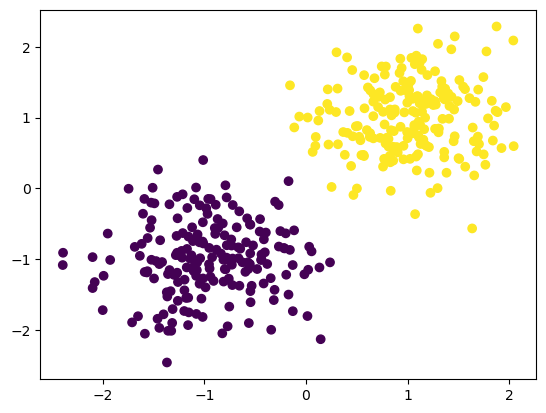

In [77]:
pred_km = try_method(sklearn.cluster.KMeans(2), data.T)

## MeanShift

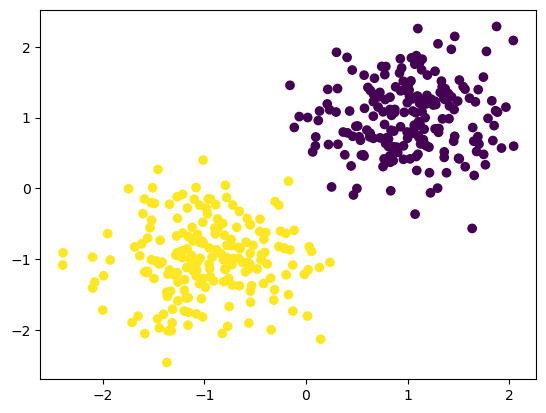

In [80]:
pred_ms = try_method(sklearn.cluster.MeanShift(), data.T)

## Spectral clustering

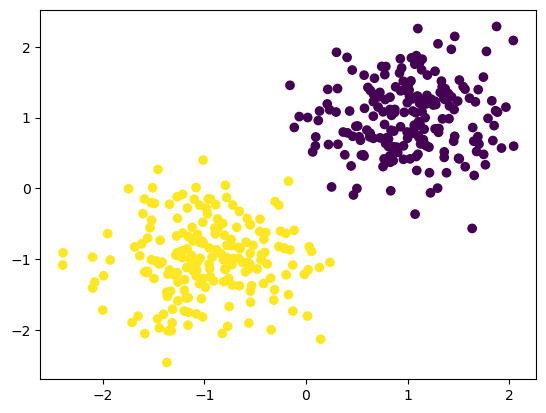

In [81]:
pred_sc = try_method(sklearn.cluster.SpectralClustering(2), data.T)

## Agglomerative Clustering

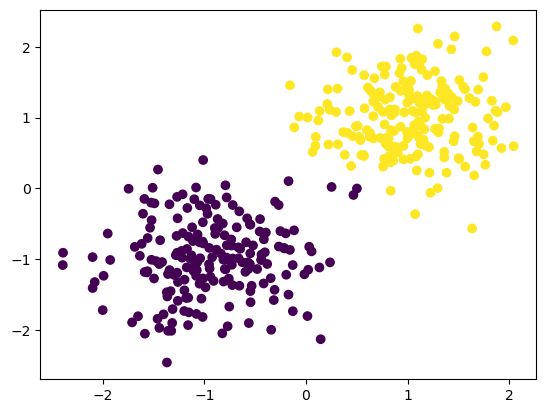

In [84]:
pred_ward = try_method(sklearn.cluster.AgglomerativeClustering(2), data.T)

## OPTICS

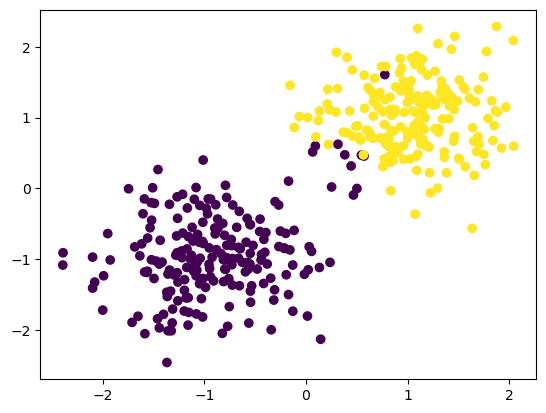

In [89]:
pred_optics = try_method(sklearn.cluster.OPTICS(min_samples=.45, max_eps=np.inf, metric='minkowski'), data.T)

## Birch

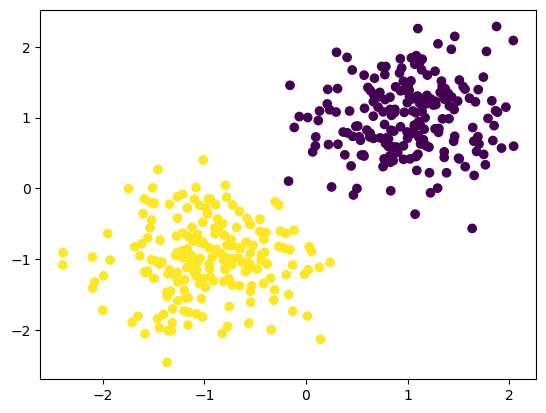

In [92]:
pred_birch = try_method(sklearn.cluster.Birch(n_clusters=2), data.T)

## Gaussian Mixture

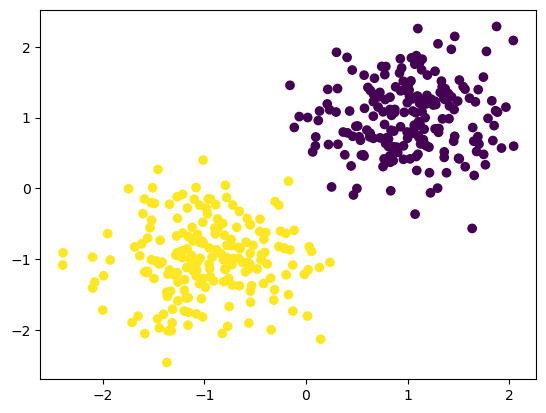

In [97]:
pred_gm = try_method(sklearn.mixture.GaussianMixture(n_components=2), data.T)

## 